In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,ConfusionMatrixDisplay
from sklearn .preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [12]:
wine=pd.read_csv('/content/winequality-red.csv')

In [4]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [13]:
wine.shape

(1599, 12)

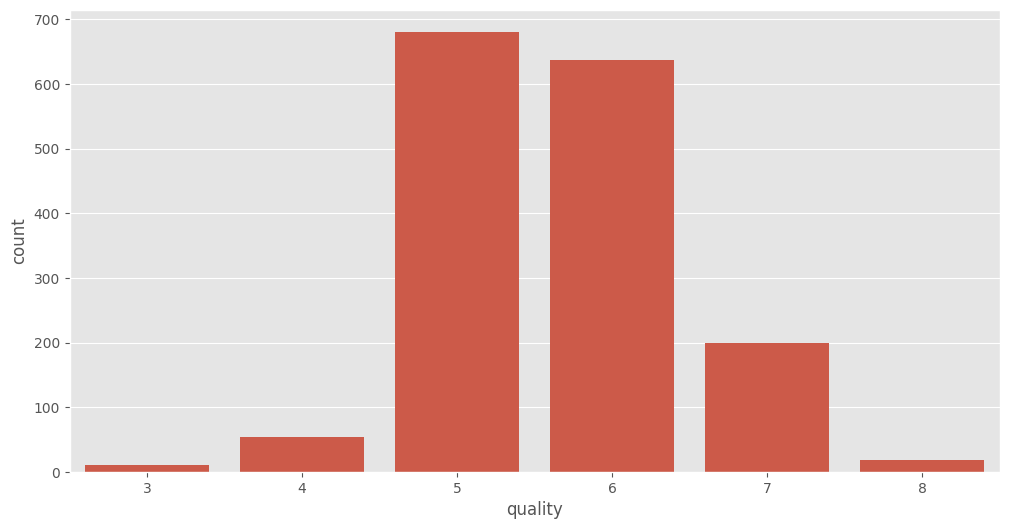

In [14]:
plt.style.use('ggplot')
plt.figure(figsize=(12, 6))
sns.countplot(x='quality', data=wine)
plt.show()

In [15]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [16]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [17]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [18]:
wine['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

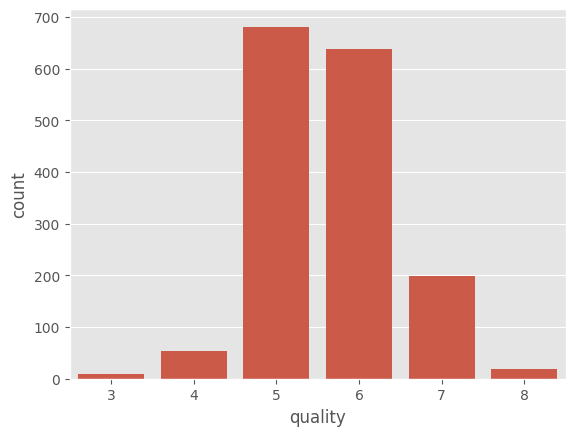

In [19]:
plt.style.use('ggplot')
sns.countplot(x='quality', data=wine)
plt.show()

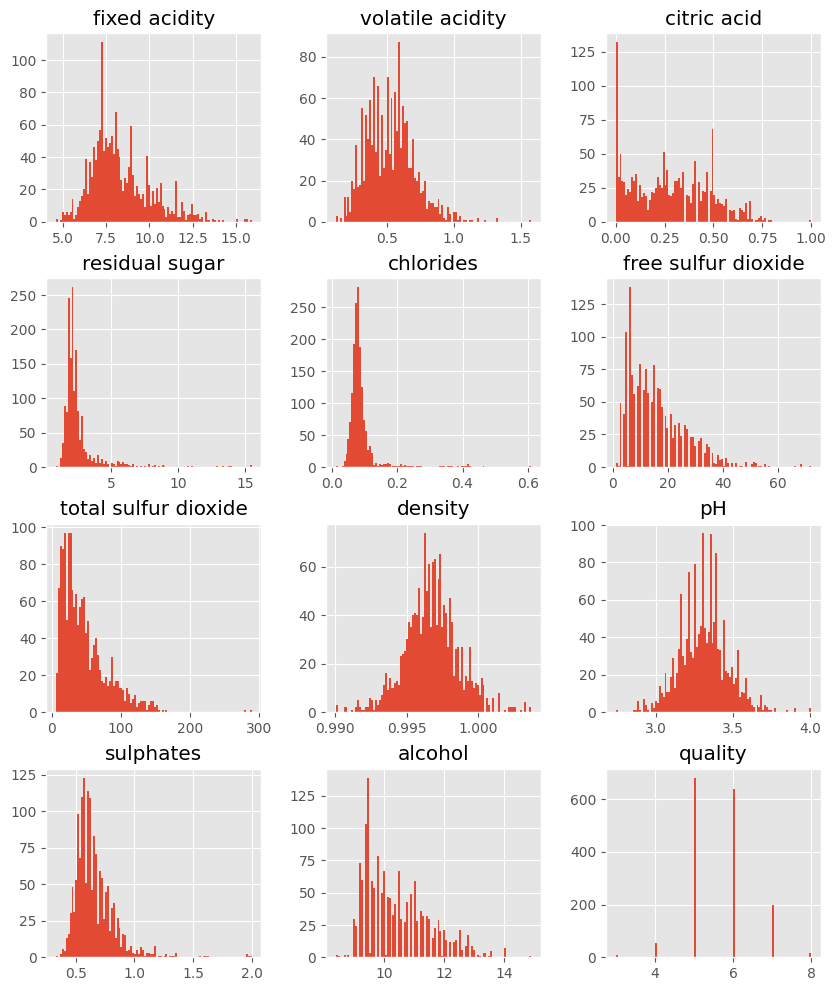

In [20]:
wine.hist(bins=100,figsize=(10,12))
plt.show()

Text(0.5, 1.0, 'Correlation between the columns')

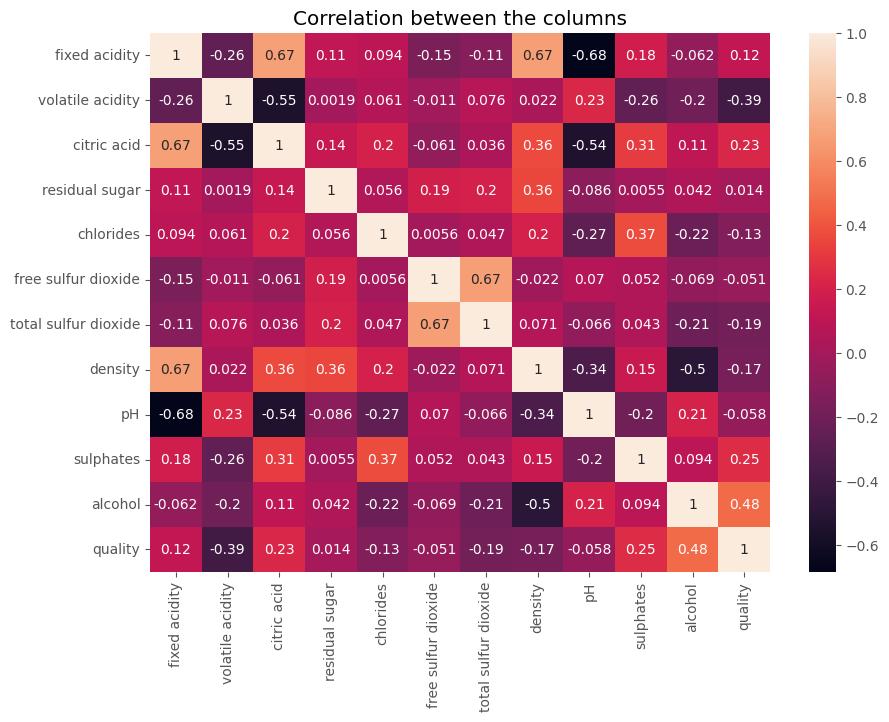

In [21]:
plt.figure(figsize=(10,7))
sns.heatmap(wine.corr(),annot=True)
plt.title("Correlation between the columns")

In [22]:
wine.corr()['quality'].sort_values()

volatile acidity       -0.390558
total sulfur dioxide   -0.185100
density                -0.174919
chlorides              -0.128907
pH                     -0.057731
free sulfur dioxide    -0.050656
residual sugar          0.013732
fixed acidity           0.124052
citric acid             0.226373
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

<Axes: xlabel='quality', ylabel='alcohol'>

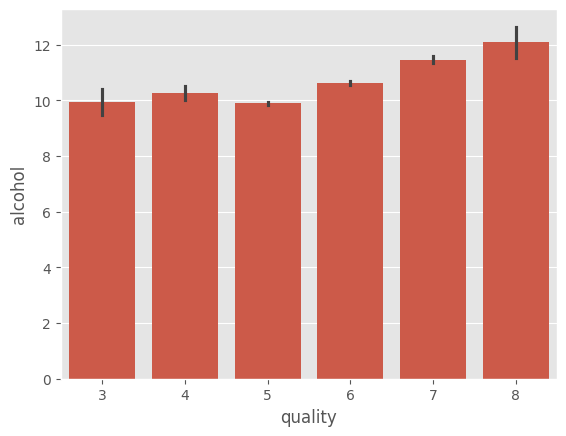

In [23]:
sns.barplot(x='quality', y='alcohol', data=wine)

In [24]:
wine['quality']=wine.quality.apply(lambda x:1 if x>=7 else 0)

In [25]:
wine['quality'].value_counts()

quality
0    1382
1     217
Name: count, dtype: int64

In [26]:
X=wine.drop('quality',axis=1)

In [27]:
Y=wine['quality']

In [28]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [29]:
print(" X_train ",X_train.shape )
print(" X_test ",X_test.shape )
print(" Y_train ",Y_train.shape )
print(" Y_test ",Y_test.shape )

 X_train  (1119, 11)
 X_test  (480, 11)
 Y_train  (1119,)
 Y_test  (480,)


In [32]:
# Logistic Regression
log=LogisticRegression()
log.fit(X_train,Y_train)
log_predict=log.predict(X_test)
log_acc=accuracy_score(log_predict,Y_test)
print("Test accuracy using Logistic Regression: {:.2f}%".2format(log_acc*100))

Test accuracy is: 86.67%


In [33]:
print(classification_report(Y_test,log_predictMB))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       413
           1       0.56      0.22      0.32        67

    accuracy                           0.87       480
   macro avg       0.72      0.60      0.62       480
weighted avg       0.84      0.87      0.84       480



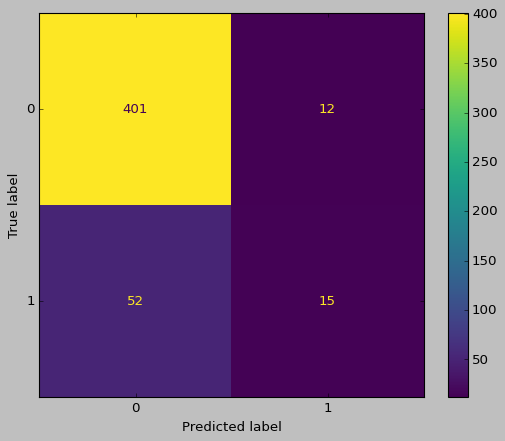

In [34]:
style.use('classic')
cm=confusion_matrix(Y_test,log_predict,labels=log.classes_)
display=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=log.classes_)
display.plot()


In [37]:
# Decision Tree
tree=DecisionTreeClassifier()
tree.fit(X_train,Y_train)
tree_predict=tree.predict(X_test)
tree_acc=accuracy_score(tree_predict,Y_test)
print("Test accuracy using Decision tree: {:.2f}%".format(tree_acc*100) )

Test accuracy: 86.46%


In [39]:
print(classification_report(Y_test,tree_predict))

              precision    recall  f1-score   support

           0       0.95      0.89      0.92       413
           1       0.51      0.69      0.59        67

    accuracy                           0.86       480
   macro avg       0.73      0.79      0.75       480
weighted avg       0.89      0.86      0.87       480



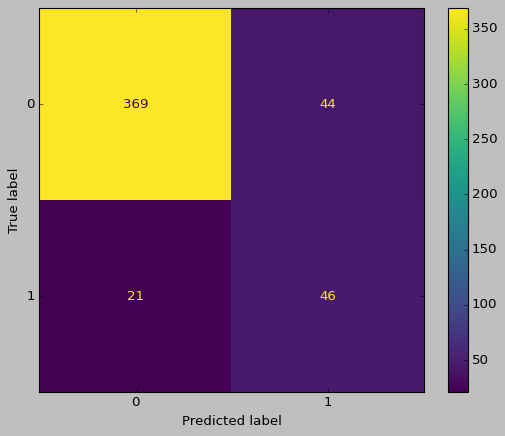

In [40]:
style.use('classic')
cm=confusion_matrix(Y_test,tree_predict,labels=tree.classes_)
display=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=tree.classes_)
display.plot()


In [41]:
# Random forest
randomforest=RandomForestClassifier()
randomforest.fit(X_train,Y_train)
randomforest_predict=randomforest.predict(X_test)
randomforest_acc=accuracy_score(randomforest_predict,Y_test)
print("Test accuracy using Random Forest: {:.2f}%".format(randomforest_acc*100))


Test accuracy: 88.96%


In [43]:
print(classification_report(Y_test,randomforest_predict))

              precision    recall  f1-score   support

           0       0.92      0.95      0.94       413
           1       0.63      0.49      0.55        67

    accuracy                           0.89       480
   macro avg       0.78      0.72      0.75       480
weighted avg       0.88      0.89      0.88       480



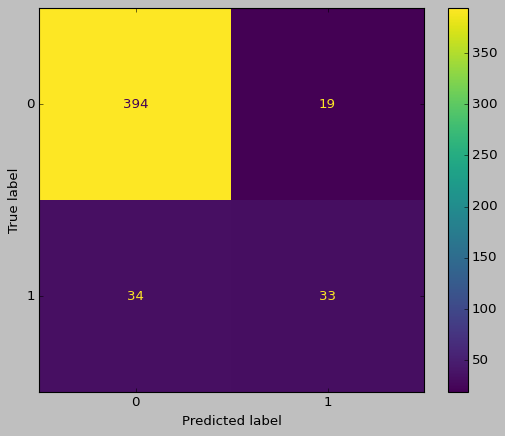

In [44]:
style.use('classic')
cm=confusion_matrix(Y_test,randomforest_predict,labels=randomforest.classes_)
display=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=randomforest.classes_)
display.plot()
